### PYMACEUTICALS INC.
---
## Analysis

Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications, recently began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

This document analyze complete data from their most recent animal study, where 249 mice who were identified with SCC tumors received treatment with a range of drug regimens, over the course of 45 days. Tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.


* - The tumor volume on mice on Capomulin and Ramicane regiments at the end of the treatment is significantly smaller than other regiments observed.

* - On Capomulin regiment, notice a considerable drop in average tumor volume after twenty days of treatment, and a slight uptick at around 40 days of treatment.

* - The correlation between mouse weight and the average tumor volume is 0.84, which makes it a strong correlation.


In [336]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import matplotlib.markers as marker

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])#.groupby("Timepoint")

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [337]:
# Checking the number of mice.
mice_count = data_complete["Mouse ID"].nunique()
mice_count

249

In [338]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_complete.loc[data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [339]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_df = data_complete.loc[data_complete['Mouse ID'] == 'g989', :]
duplicate_mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [340]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean_df = data_complete.loc[data_complete['Mouse ID'] != 'g989', :]
data_clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [341]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = data_clean_df["Mouse ID"].nunique()
mice_count_clean


248

# Summary Statistics

In [342]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = data_clean_df["Tumor Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).mean()
median = data_clean_df["Tumor Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).median()
variance = data_clean_df["Tumor Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).var()
deviation = data_clean_df["Tumor Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).std()
sem = data_clean_df["Tumor Volume (mm3)"].groupby(data_clean_df["Drug Regimen"]).sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": deviation, "Tumor Volume Std. Err.":sem})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [343]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation = data_clean_df.groupby(["Drug Regimen"])[
    ["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_aggregation


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

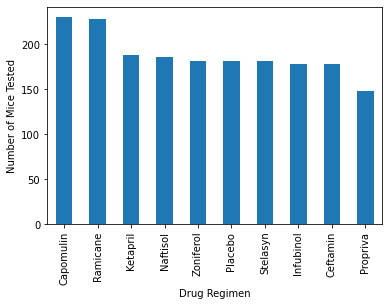

In [344]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_total = data_clean_df["Drug Regimen"].value_counts()
mice_total.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()



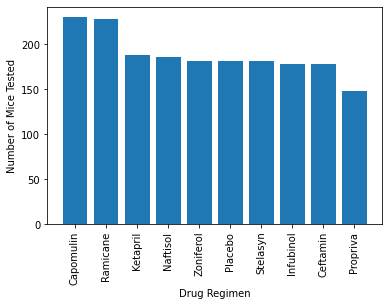

In [345]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_total.index.values
y_axis = mice_total.values

plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()


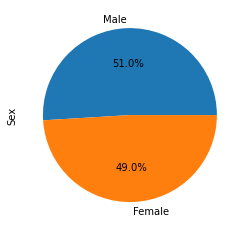

In [346]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = data_clean_df["Sex"].value_counts()
gender.plot.pie(autopct="%1.1f%%")
plt.show()


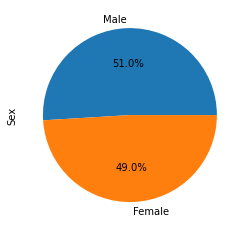

In [347]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index.values
sizes = gender.values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

** Calculate the final tumor volume of each mouse across four of the treatment regimens:
** Capomulin, Ramicane, Infubinol, and Ceftamin

** Start by getting the last (greatest) timepoint for each mouse

** Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


* Capomulin

In [348]:
capomulin = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_max = capomulin.groupby("Mouse ID").max()['Timepoint']
capomulin_volume = pd.DataFrame(capomulin_max)
capomulin_merge = pd.merge(capomulin_volume, data_clean_df, on=(
    "Mouse ID", "Timepoint"), how="left")
capomulin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [349]:
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]
quartiles = capomulin_tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


* Ramicane

In [350]:
ramicane = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ramicane", :]
ramicane_max = ramicane.groupby("Mouse ID").max()['Timepoint']
ramicane_volume = pd.DataFrame(ramicane_max)
ramicane_merge = pd.merge(ramicane_volume, data_clean_df, on=(
    "Mouse ID", "Timepoint"), how="left")
ramicane_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [351]:
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]
quartiles = ramicane_tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


* Infubinol

In [352]:
infubinol = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Infubinol", :]
infubinol_max = infubinol.groupby("Mouse ID").max()['Timepoint']
infubinol_volume = pd.DataFrame(infubinol_max)
infubinol_merge = pd.merge(infubinol_volume, data_clean_df, on=(
    "Mouse ID", "Timepoint"), how="left")
infubinol_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [353]:
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]
quartiles = infubinol_tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


* Ceftamin

In [354]:
ceftamin = data_clean_df.loc[data_clean_df["Drug Regimen"] == "Ceftamin", :]
ceftamin_max = ceftamin.groupby("Mouse ID").max()['Timepoint']
ceftamin_volume = pd.DataFrame(ceftamin_max)
ceftamin_merge = pd.merge(ceftamin_volume, data_clean_df, on=(
    "Mouse ID", "Timepoint"), how="left")
ceftamin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [355]:
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]
quartiles = ceftamin_tumors.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [356]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset

# Determine outliers using upper and lower bounds

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = data_clean_df[data_clean_df["Drug Regimen"].isin(drug_list)]

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(
    tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)

    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment += 1


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

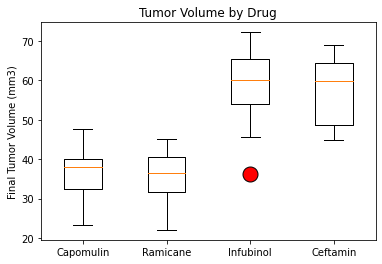

In [357]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumors = [capomulin_tumors, ramicane_tumors,
          infubinol_tumors, ceftamin_tumors]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()

flierprops = dict(marker='o', markerfacecolor='r', markersize=15,
                  linestyle='none', markeredgecolor='k')
ax1.boxplot(tumors, labels=labels, flierprops=flierprops)
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.title("Tumor Volume by Drug")

plt.show()


## Line and Scatter Plots

In [358]:
capomulin_tumors.head()

0    38.982878
1    38.939633
2    30.485985
3    37.074024
4    40.159220
Name: Tumor Volume (mm3), dtype: float64

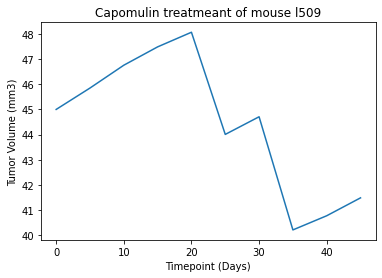

In [359]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_line = capomulin.loc[capomulin["Mouse ID"] == "l509", :]
x_axis = cap_line["Timepoint"]
y_axis = cap_line["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


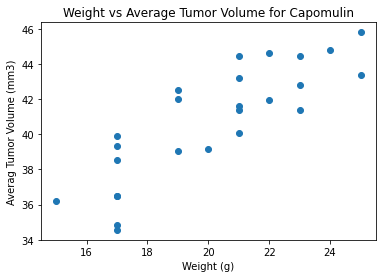

In [360]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
average_volume = capomulin.groupby(['Mouse ID']).mean()
weight = average_volume['Weight (g)']
volume = average_volume['Tumor Volume (mm3)']
plt.scatter(weight, volume)
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume for Capomulin')

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


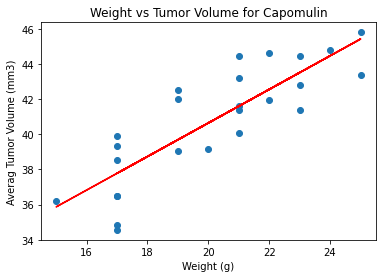

In [361]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
print(
    f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,volume)[0],2)}")
plt.scatter(weight, volume)
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title("Weight vs Tumor Volume for Capomulin")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight, volume)
pe_fit = pe_slope * weight + pe_int
plt.plot(weight, pe_fit, "-", color='r')

plt.show()
